# Choose a Data Set
Use data gathered from one of the following APIs: 
- [TV Series Endpoints from TMDB (you cannot use any of the Movie endpoints!)](https://developer.themoviedb.org/reference/tv-series-airing-today-list)
- [Open Weather](https://openweathermap.org/api)
- [NASA API](https://api.nasa.gov/)
- [API Football](https://www.api-football.com/documentation-v3)
- [RAWG Video Games](https://rawg.io/apidocs)

**OR** 

Pick two or more datasets from one of the following folders: 
- [Olympic Games 2024](https://drive.google.com/drive/folders/1AqsNDn1HjdGBpj6CuxoGrog-Dg6Y_ecO?usp=sharing)
- [Diabetes Indicators](https://drive.google.com/drive/folders/1lXwQOk3oMVZRIDB_DuD8IhMh7rjERsFH?usp=drive_link)
- [Amazon Sales](https://drive.google.com/drive/folders/1VYUZ0vspKZQHgmbhe1qt-mjeeqVJJ58r?usp=drive_link)
- [NBA](https://drive.google.com/drive/folders/1tBGqAJTpXRtmETAjSNyba_kRWGR4JKHt?usp=drive_link)
- [Recipes](https://drive.google.com/drive/folders/18ybwQLoDTHF8EFfNtx9SxKco9Y4m9Z2I?usp=drive_link)


# My Question
### How does the title of a show, especially the title's length, relate to the popularity of that show?

# My Answer

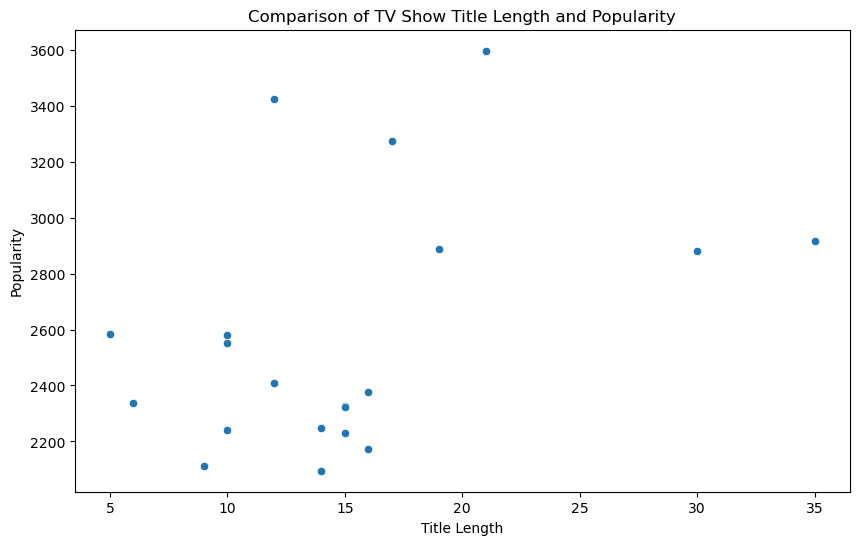

In [15]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://api.themoviedb.org/3/tv/popular?api_key=2506809414e7e87299276cc84c91921e"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    if 'results' in data:
        tv_shows = []
        for show in data['results']:
            title = show['name']
            popularity = show['popularity']
            title_length = len(title)
            tv_shows.append({'Title': title, 'Title Length': title_length, 'Popularity': popularity})

        df = pd.DataFrame(tv_shows)

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Title Length', y='Popularity', data=df)
        plt.title('Comparison of TV Show Title Length and Popularity')
        plt.xlabel('Title Length')
        plt.ylabel('Popularity')
        plt.show()

Correlation Coefficient: 0.41


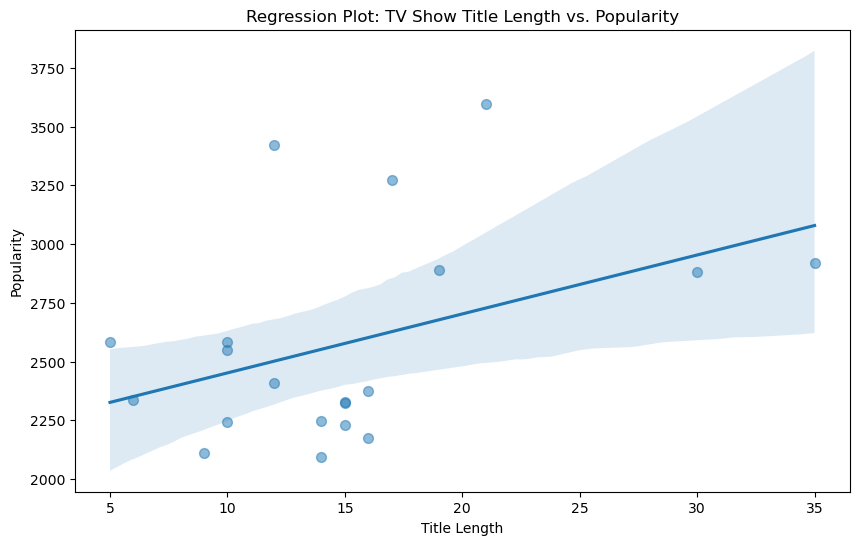

In [14]:

correlation = df['Title Length'].corr(df['Popularity'])
print(f"Correlation Coefficient: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Title Length', y='Popularity', data=df, scatter_kws={"s": 50, "alpha": 0.5})
plt.title('Regression Plot: TV Show Title Length vs. Popularity')
plt.xlabel('Title Length')
plt.ylabel('Popularity')
plt.show()


My code seems to suggest that the longer a show's title is, the more likely it is to be popular. This is the oppisite of what I expected, as I thought shorter, catchy titles would be the most popular. The corelation is only .41, which isn't too strong, suggesting that the length of a show's title doesn't matter too much to popularity.